In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [3]:
df=pd.read_csv('Bank Customer churn prediction.csv')

In [4]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

<Axes: xlabel='churn', ylabel='count'>

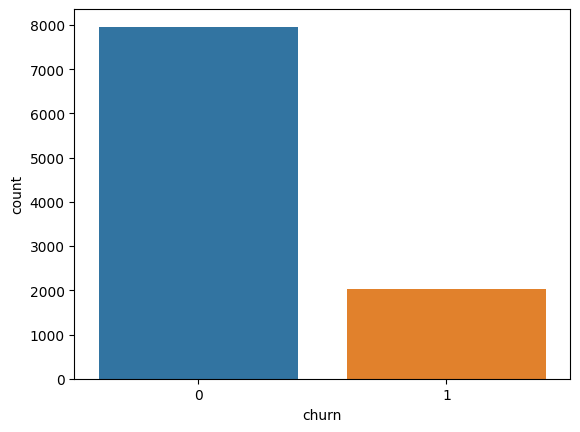

In [7]:
sns.countplot(x=df['churn'])

In [8]:
#This is an imbalanced data

Using the method below:

For Oversampling

In [10]:
data1_over=df[df['churn']==0]

In [11]:
df[df['churn']==1]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,15737452,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,15672754,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,15768163,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,15769959,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [12]:
data2_over=df[df['churn']==1].sample(7963,replace=True)

In [13]:
data_over=pd.concat([data1_over,data2_over],axis=0)

In [14]:
data_over

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9975,15666295,610,Germany,Male,50,1,113957.01,2,1,0,196526.55,1
5824,15698953,636,Spain,Male,36,1,0.00,3,1,1,74048.10,1
2868,15707968,545,Spain,Male,36,8,73211.12,2,1,0,89587.34,1
1212,15813590,610,Spain,Male,42,6,0.00,2,1,0,158302.59,1


In [15]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
lecoder=LabelEncoder()
stdscaler=StandardScaler()
data_over['country']=lecoder.fit_transform(data_over['country'])

In [16]:
male=pd.get_dummies(data_over['gender'],drop_first=True)
male

,Male
1,0
3,0
4,0
6,1
8,1
...,...
9975,1
5824,1
2868,1
1212,1


In [17]:
data_over=pd.concat([data_over,male],axis=1)

In [18]:
data_over

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Male
1,15647311,608,2,Female,41,1,83807.86,1,0,1,112542.58,0,0
3,15701354,699,0,Female,39,1,0.00,2,0,0,93826.63,0,0
4,15737888,850,2,Female,43,2,125510.82,1,1,1,79084.10,0,0
6,15592531,822,0,Male,50,7,0.00,2,1,1,10062.80,0,1
8,15792365,501,0,Male,44,4,142051.07,2,0,1,74940.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,15666295,610,1,Male,50,1,113957.01,2,1,0,196526.55,1,1
5824,15698953,636,2,Male,36,1,0.00,3,1,1,74048.10,1,1
2868,15707968,545,2,Male,36,8,73211.12,2,1,0,89587.34,1,1
1212,15813590,610,2,Male,42,6,0.00,2,1,0,158302.59,1,1


In [19]:
data_over.drop(['customer_id','gender'],axis=1,inplace=True)

In [20]:
#Analyse the data

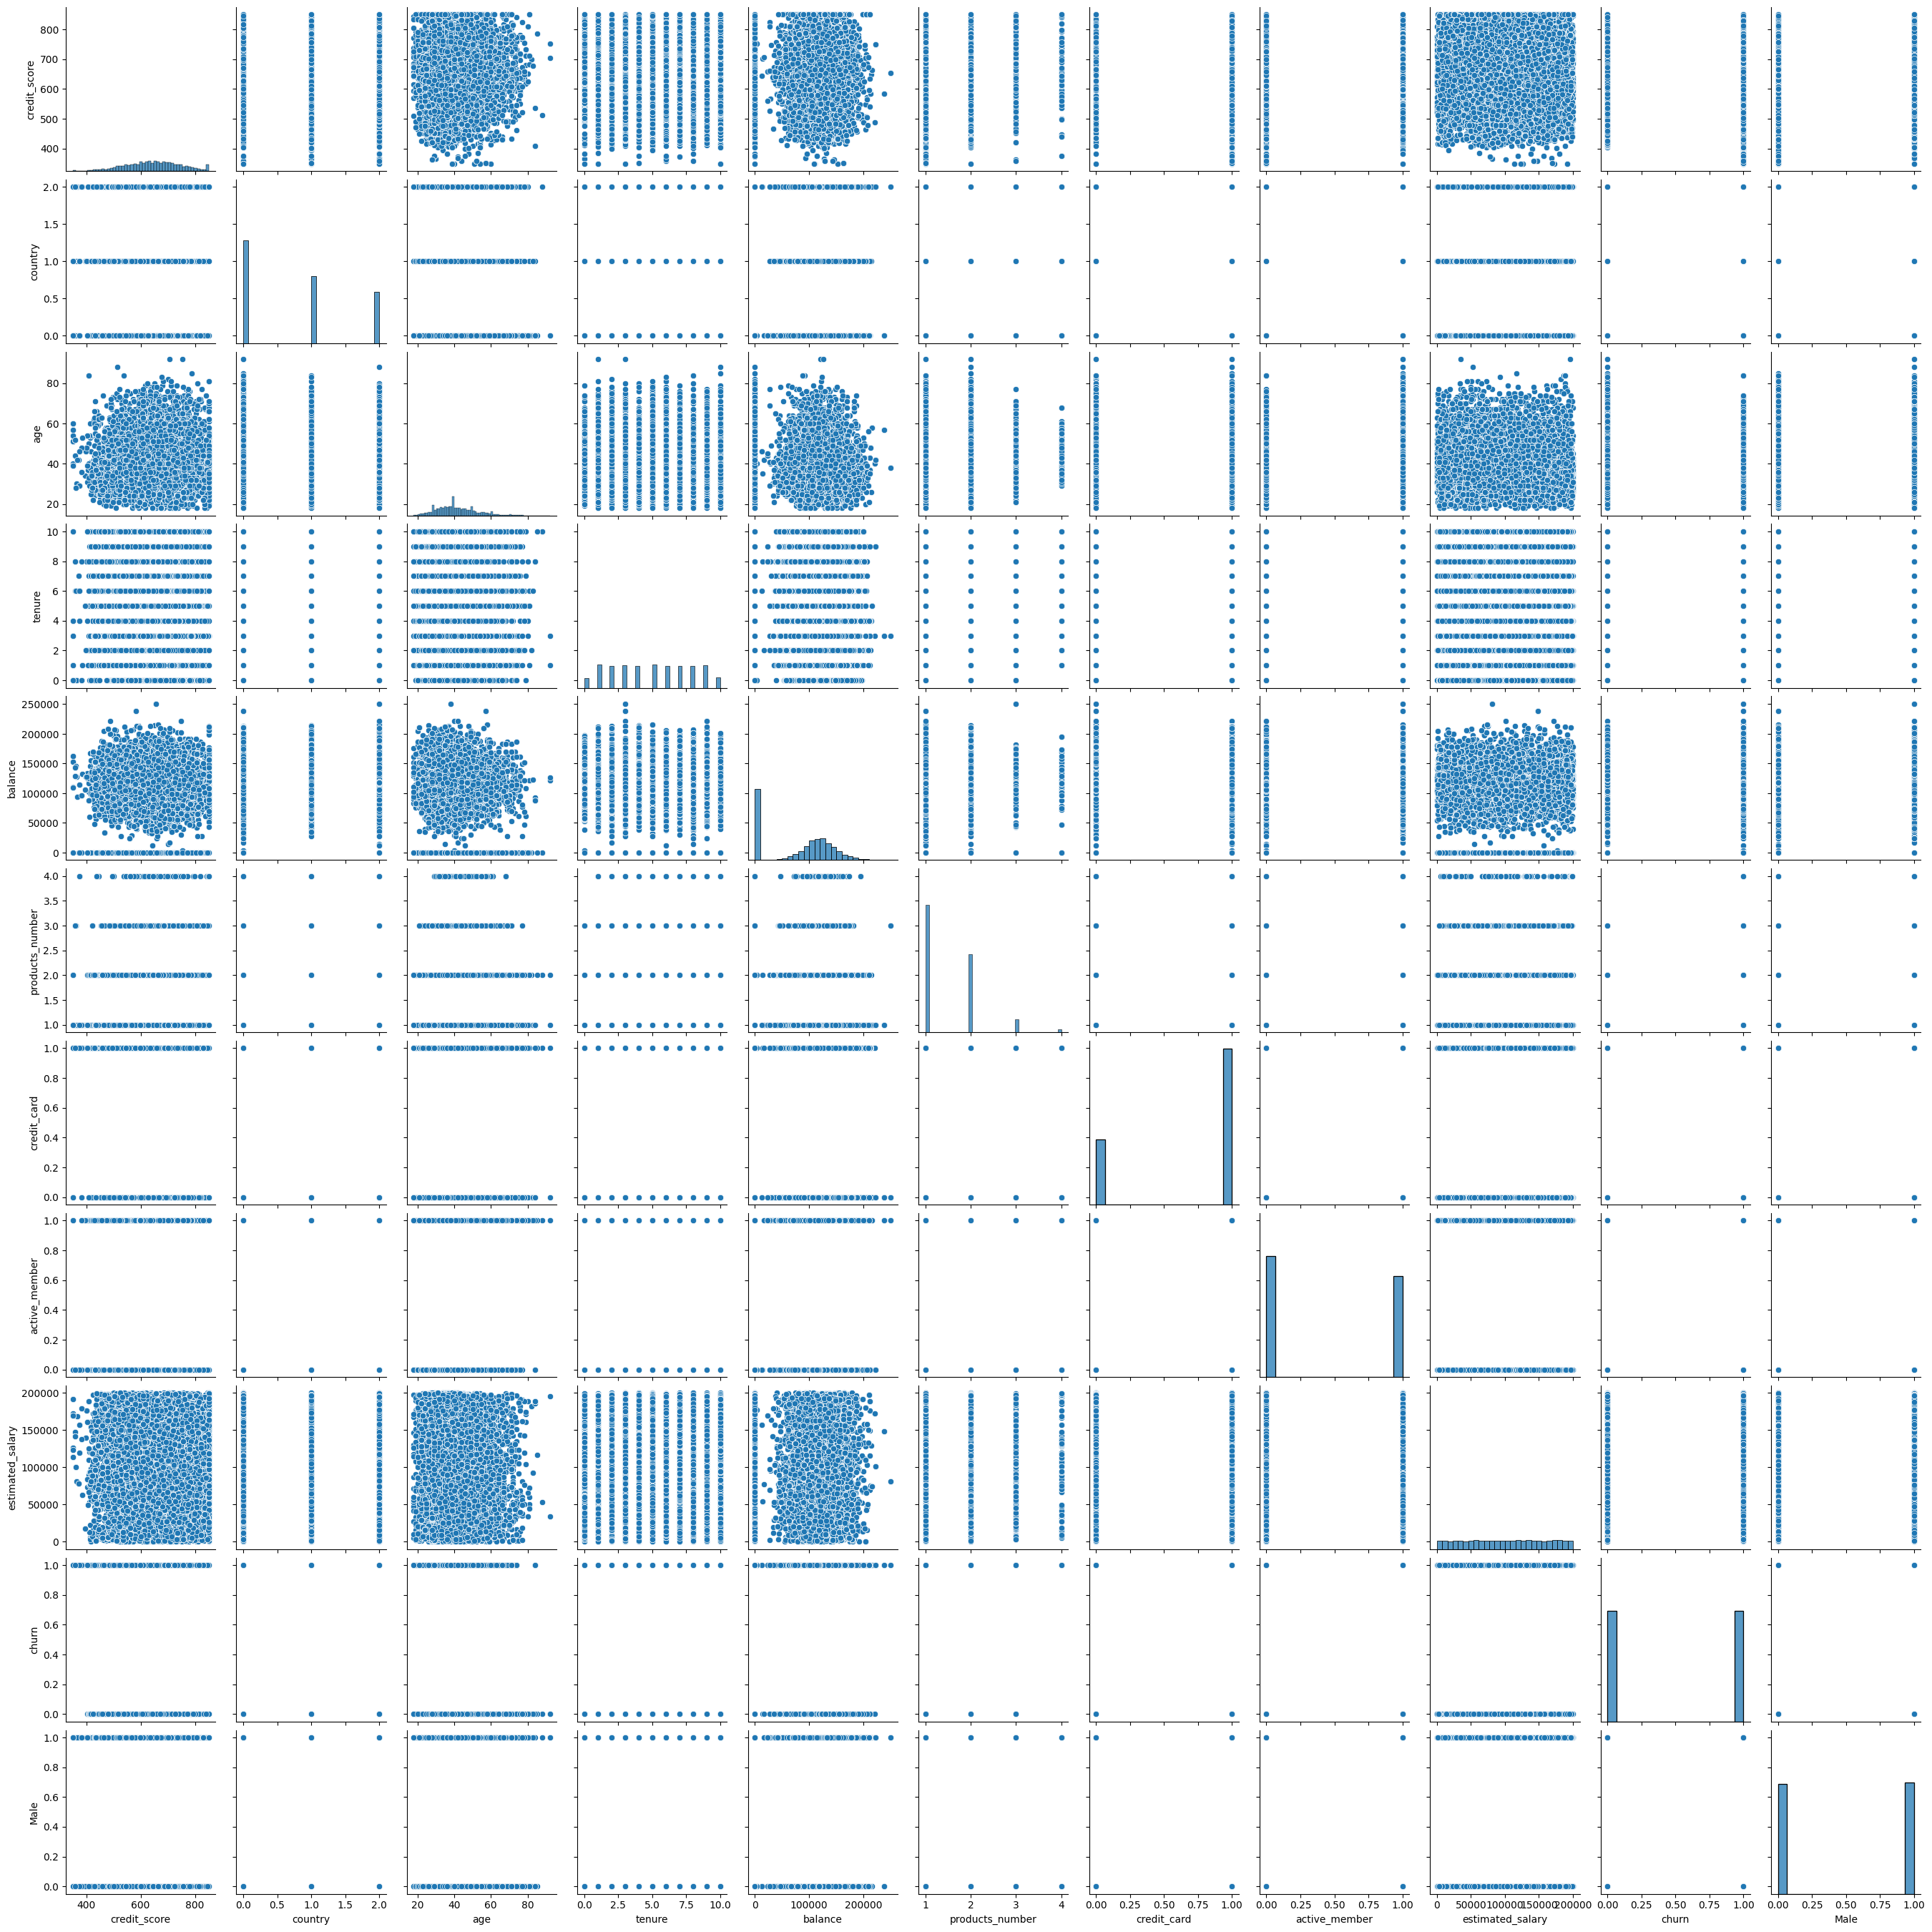

In [21]:
sns.pairplot(data=data_over)

<Axes: >

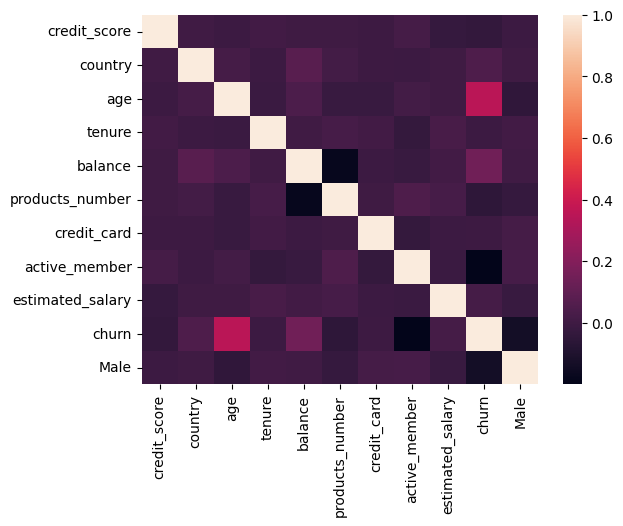

In [23]:
sns.heatmap(data_over.corr())

In [24]:
y=data_over['churn']
X=data_over.drop('churn',axis=1)

In [25]:
X

,credit_score,country,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,Male
1,608,2,41,1,83807.86,1,0,1,112542.58,0
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,43,2,125510.82,1,1,1,79084.10,0
6,822,0,50,7,0.00,2,1,1,10062.80,1
8,501,0,44,4,142051.07,2,0,1,74940.50,1
...,...,...,...,...,...,...,...,...,...,...
9975,610,1,50,1,113957.01,2,1,0,196526.55,1
5824,636,2,36,1,0.00,3,1,1,74048.10,1
2868,545,2,36,8,73211.12,2,1,0,89587.34,1
1212,610,2,42,6,0.00,2,1,0,158302.59,1


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [27]:
len(y_train)

12740

In [28]:
X_train_scaled=stdscaler.fit_transform(X_train)
X_test_scaled=stdscaler.fit_transform(X_test)

In [30]:
X_test_scaled

array([[ 0.55893248,  1.51329954, -1.98372317, ...,  1.08728643,
        -1.03103505,  0.99187233],
       [ 0.26618397,  1.51329954, -0.16282611, ..., -0.91972085,
        -0.00972001,  0.99187233],
       [-1.177369  , -0.97258462,  2.13725438, ...,  1.08728643,
        -1.32989819, -1.00819428],
       ...,
       [-1.27831676, -0.97258462, -0.2586628 , ...,  1.08728643,
         0.62531356,  0.99187233],
       [-0.06694364,  0.27035746, -0.83368292, ...,  1.08728643,
        -0.02675974,  0.99187233],
       [-1.03604214,  0.27035746,  1.84974432, ...,  1.08728643,
         1.3308701 , -1.00819428]])

In [39]:
model=keras.Sequential([keras.layers.Dense(10,input_dim=10,activation='relu'),
                       keras.layers.Dense(6000,activation='relu'),
                        keras.layers.Dense(3000,activation='relu'),
                        keras.layers.Dense(700,activation='relu'),
                      keras.layers.Dense(100,activation='relu'),
                      keras.layers.Dense(1,activation='sigmoid')

                       ])

model.compile(loss='binary_crossentropy',optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
399/399 [==============================] - 728s 2s/step - loss: 0.5592 - accuracy: 0.7115
Epoch 2/30
399/399 [==============================] - 704s 2s/step - loss: 0.4947 - accuracy: 0.7564
Epoch 3/30
399/399 [==============================] - 700s 2s/step - loss: 0.4766 - accuracy: 0.7677
Epoch 4/30
399/399 [==============================] - 698s 2s/step - loss: 0.4667 - accuracy: 0.7746
Epoch 5/30
399/399 [==============================] - 703s 2s/step - loss: 0.4574 - accuracy: 0.7797
Epoch 6/30
399/399 [==============================] - 709s 2s/step - loss: 0.4432 - accuracy: 0.7876
Epoch 7/30
399/399 [==============================] - 709s 2s/step - loss: 0.4368 - accuracy: 0.7951
Epoch 8/30
399/399 [==============================] - 693s 2s/step - loss: 0.4251 - accuracy: 0.7995
Epoch 9/30
399/399 [==============================] - 3196s 8s/step - loss: 0.4143 - accuracy: 0.8095
Epoch 10/30
399/399 [==============================] - 664s 2s/step - loss: 0.4002 - accur

In [40]:
prediction=model.predict(X_test_scaled)


100/100 [==============================] - 17s 161ms/step


In [41]:
y_predict=np.round(prediction)

In [42]:
y_test

1327    0
121     0
769     1
881     1
3535    0
       ..
7701    1
1010    1
1760    1
7874    0
734     1
Name: churn, Length: 3186, dtype: int64

In [43]:
model.evaluate(X_test_scaled,y_test)

100/100 [==============================] - 12s 107ms/step - loss: 0.4052 - accuracy: 0.8858


[0.40519630908966064, 0.8857501745223999]

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       0.93      0.83      0.88      1593\n           1       0.85      0.94      0.89      1593\n\n    accuracy                           0.89      3186\n   macro avg       0.89      0.89      0.89      3186\nweighted avg       0.89      0.89      0.89      3186\n'

In [46]:
confusion_matrix(y_test,y_predict)

array([[1330,  263],
       [ 101, 1492]], dtype=int64)